<a href="https://colab.research.google.com/github/ujkim25/sparta_ai_engineering/blob/main/api_parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from openai import OpenAI
import json

In [ ]:
client = OpenAI(api_key=OPENAI_API_KEY)

In [ ]:
file = client.files.create(
    file = open("pdf_3.pdf", "rb"),
    purpose = "user_data"
)

In [ ]:
completion = client.chat.completions.create(
    model="gpt-5-mini-2025-08-07",
    messages = [
        {
            "role":"user",
            "content": [
                {
                    "type":"file",
                    "file": {
                        "file_id": file.id
                    }
                },
                {
                    "type":"text",
                    "text":"이 안에 있는 내용들 전부 파싱해줘 이미지랑 텍스트 모두"
                }
            ]
        }
    ]
)

In [ ]:
print(completion.choices[0].message.content)

아래는 첨부된 두 페이지(이미지 포함)에 있는 모든 텍스트를 가능한 한 빠짐없이 한글로 그대로 전사(파싱)한 내용입니다. 페이지별로 이미지에 들어있는 텍스트(인포그래픽, 도표, 상자, 화살표 등)와 문단 텍스트를 모두 포함했습니다.

---  
페이지 1 (이미지 포함) — 페이지 번호 표기: 17 / 40
헤더:
- ① 경착륙 후 장기 저성장 단계 진입
- 향후 중국 경제의 진로

타이틀(큰 글씨):
- 경착륙 후에 기업 디레버리징, 자산 디플레이션 단계가 이어지고, 일련의 정책 대응 실패와 디플레 심리 고착으로 저성장 장기화

상단에 3단 박스(왼→중→오):
- 기업 디레버리징 단계
  : 기업 부도와 신용 수축의 악순환
- 자산 디플레이션 단계
  : 자산 가치 하락과 신용 수축의 악순환
- 디플레 심리 고착 단계
  : 디플레 심리가 확산·고착, 저성장 장기화

중앙 인포그래픽(왼쪽 순환 → 가운데 순환 → 오른쪽 동심환/구조)
왼쪽 사이클(왼쪽 위 작은 화살표 텍스트 포함):
- 가파른 성장 둔화 (왼쪽 가장자리 텍스트)
- (원형 사이클 상) 기업 대량/연쇄 부도 → 은행 신용 수축 → (다시 기업 대량/연쇄 부도) (순환)
- 사이클 중앙에서 오른쪽으로 화살표: 경기전망 악화

가운데 사이클:
- 자산가치 급락 ↔ 은행 신용 수축 (원형)
- 경기전망 악화 (왼쪽에서 오는 화살표)
- 경기 대책 실패, 경기부진 장기화 (오른쪽에 텍스트)

오른쪽(디플레 심리 고착 표시된 동심원):
- 디플레 심리 고착 (상단 라벨)
- 동심원 내부(중앙 작은 원): 저성장 지속
- 그 둘러싼 원들(내부→외부): 디레버리징 → 저성장 지속 (중앙) → 자산 디플레 → 정치사회적 불안 (외곽)
- 오른쪽 화살표: 저성장 장기화

하단 상세 설명(세 영역에 대한 설명, 체크박스 모양으로 정리된 문단):
왼쪽 블록(기업 디레버리징 관련):
- ✓ 성장 둔화 → 기업 대량 부도 → 자금시장 경색 → 경기 더욱 악화
  → 기업 부도사태가 밸류체인(전업종/전산업) 확산 → 

In [ ]:
!pip install PyPDF2 pdfplumber  Pillow opencv-python easyocr pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 22.9 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np

import PyPDF2
import pdfplumber
import easyocr
from PIL import Image
import cv2

In [ ]:
pdf_files = [
    "pdf_1.pdf",
    "pdf_2.pdf",
    "pdf_3.pdf",
    "기술동향.pdf"
]

In [ ]:
text = ""
with open("기술동향.pdf", "rb") as file:
    pdf_reader = PyPDF2.PdfReader(file)
    print(f"총 페이지 수: {len(pdf_reader.pages)}")

    for page_num, page in enumerate(pdf_reader.pages):
        page_text = page.extract_text()
        print(page_text)

총 페이지 수: 1
❚4
’24년 상위 10대 신흥 기술 (WEF, 6.25)
세계경제포럼 (WEF) 이 전 세계 과학자 , 연구자 , 미래학자를 대상으로 진행한 설문조사를 
통해 경제·사회에 현저한 영향을 미칠 것으로 예상되는 10대 신흥 기술을 선정
- 참신성 , 적용 가능성 , 발전 수준, 영향력을 기준으로 5년 이내에 광범위하게 사용될 
것으로 예상되는 혁신 기술을 검토·선정
▘WEF 10대 신흥 기술▗
기술 주요 내용
과학적 발견을 
위한 AI∙ 과학 문헌 마이닝 , 가설 수립, 과학 데이터 분석, 새로운 발견 등에 AI 기술 활용
※ ▲(’21~’23 년 상위 투자국 ) 미국, 중국, 인도, 영국, 독일 ▲(기술 주도 산업) 인터넷 , 소프트웨어 , 
헬스케어 , 컴퓨터 하드웨어 , 제조
개인정보 보호 
강화 기술∙ 개인 식별정보가 포함되지 않는 합성데이터 (synthetic data)를 통해 민감 데이터 작업 
시의 제약이 완화되고 정보 처리 방식이 혁신될 것으로 기대
※ ▲(’21~’23 년 상위 투자국 ) 미국, 중국, 네덜란드 , 영국, 케이맨 제도 ▲(기술 주도 산업) 인터넷 , 
소프트웨어 , 전기전자 , 헬스케어 , 제조
재구성 가능한 
지능형 표면∙ 6G 이동통신의 핵심 안테나 기술로서 실시간 수요에 따라 구성을 동적으로 조정할 수 
있어 무선 네트워크의 에너지 효율을 향상시키고 스마트 공장 등 다수 분야에 응용 가능
※ ▲(’21~’23 년 상위 투자국 ) 미국, 중국, 영국, 스웨덴 , 호주 ▲(기술 주도 산업) 이동통신 , 소프
트웨어 , 인터넷 , 에너지 , 전기전자
고고도 
통신시스템
(HAPS)∙ 상공 약 20km 의 성층권 영역에 비행체 형태의 플랫폼을 체공시켜 통신을 중계하는 
무선 중계 시스템으로 , 위성이나 지상 기지국에 비해 제공범위와 성능이 뛰어나고 
디지털 격차 해소에 유용
※ ▲(’21~’23 년 상위 투자국 ) 독일, 미국, 영국, 프랑스 , 아일랜드 ▲(기술 주도 산업) 자동차 ·운송, 
제조, 소프트웨어 

In [ ]:
text = ""
tables_info = []

with pdfplumber.open("기술동향.pdf") as pdf:
    print(f"총 페이지 수: {len(pdf.pages)}")

    for page_num, page in enumerate(pdf.pages):
        page_text = page.extract_text()
        if page_text:
            text += f"\n--- 페이지 {page_num + 1} ---\n"
            text += page_text

        tables = page.extract_tables()

총 페이지 수: 1


In [ ]:
tables

[[['기술', '주요 내용']]]

In [ ]:
image_path = "기술동향.jpeg"
image = cv2.imread(image_path)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
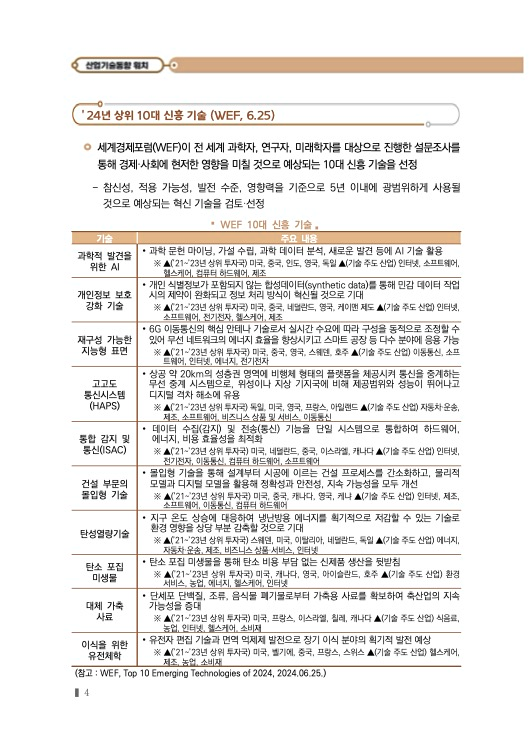

In [ ]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
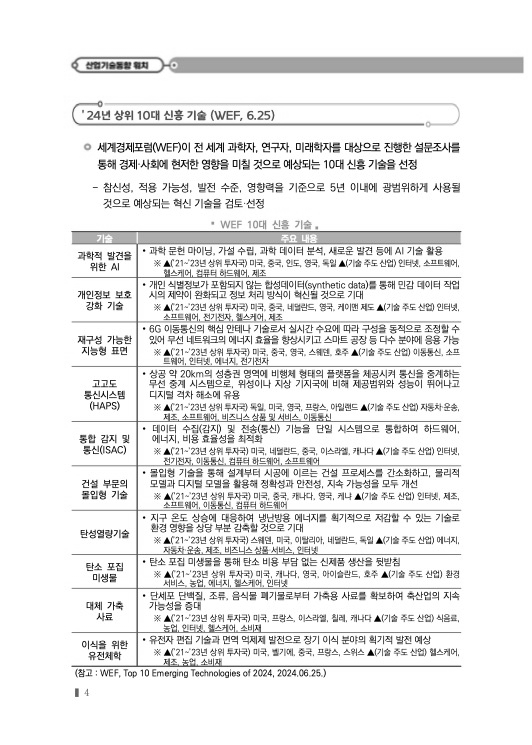

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
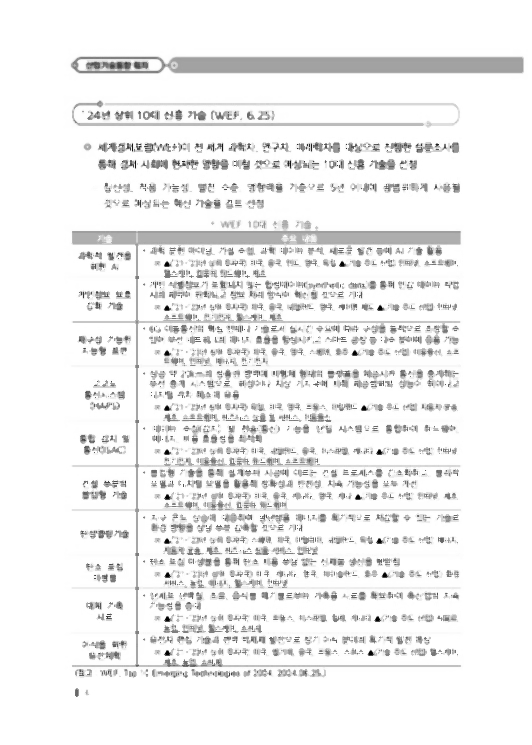

In [ ]:
denoised = cv2.medianBlur(gray, 3)
denoised

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
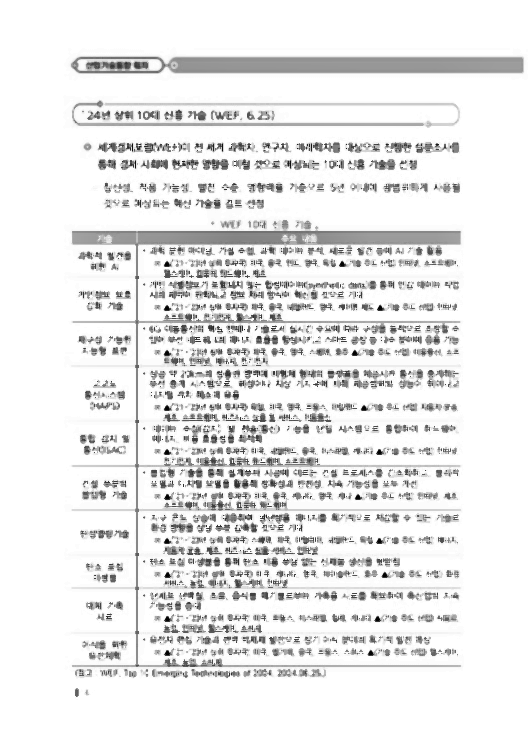

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(denoised)
enhanced

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
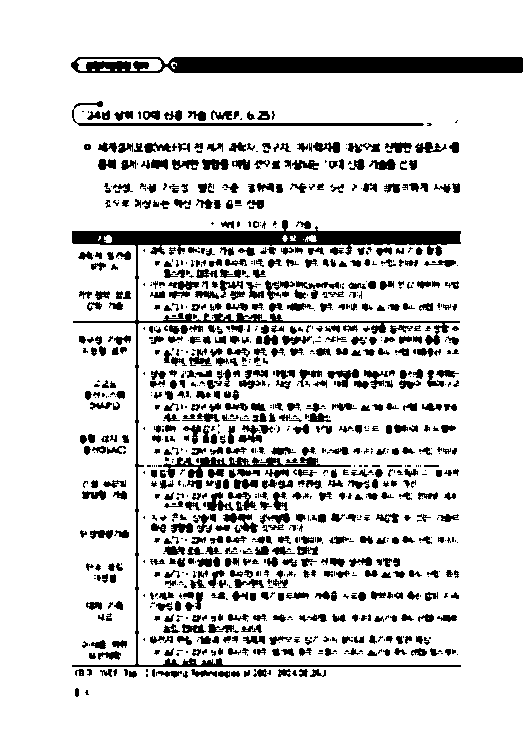

In [ ]:
_, binary = cv2.threshold(enhanced,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
binary

In [ ]:
reader = easyocr.Reader(["ko","en"],gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
results = reader.readtext(binary)
results

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[([[np.int32(85), np.int32(109)],
   [np.int32(279), np.int32(109)],
   [np.int32(279), np.int32(123)],
   [np.int32(85), np.int32(123)]],
  "'HU 사혀 109 대 개 (YEI 631",
  np.float64(0.03201094514342756)),
 ([[np.int32(99), np.int32(139)],
   [np.int32(461), np.int32(139)],
   [np.int32(461), np.int32(157)],
   [np.int32(99), np.int32(157)]],
  '사래보 { t+터 현 -치 4t차.쇼구# 빼#채다 +X 신청다 s소소새 ',
  np.float64(0.00017445446753246182)),
 ([[np.int32(121), np.int32(157)],
   [np.int32(253), np.int32(157)],
   [np.int32(253), np.int32(173)],
   [np.int32(121), np.int32(173)]],
  "구e' 사서 법i다' v 얘",
  np.float64(0.0024895392872110855)),
 ([[np.int32(283), np.int32(157)],
   [np.int32(421), np.int32(157)],
   [np.int32(421), np.int32(173)],
   [np.int32(283), np.int32(173)]],
  "겨+표 '머스 1_부",
  np.float64(0.026004927308994008)),
 ([[np.int32(101), np.int32(179)],
   [np.int32(463), np.int32(179)],
   [np.int32(463), np.int32(197)],
   [np.int32(101), np.int32(197)]],
  '!선설 책" } 눈격 -친 3+ 7#91 t슈;훈 선 \' 

In [ ]:
extracted_text = ""
confidence_scores = []

for (bbox, text, confidence) in results:
    if confidence > 0.01:
        extracted_text += text + " "
        confidence_scores.append(confidence)

In [ ]:
print(extracted_text)

'HU 사혀 109 대 개 (YEI 631 겨+표 '머스 1_부 세 t9 4 t) 45R A 47: T버 T '눈 염다 구 대' #소# 쇼7 마구 # '사여 '5 - "규 벼 #나 #+ : 1 +' 채? { 초 +4 #i #벼시선# 구나b Kli 기 수1 ? # 깨요 457) 서 483H5; 거고 " r"i"_ #구 ## 기네 _ 대단 비구- 4L 대 H; + 무44 _ 채  + 버구 구C 44 바구 키' 7모= 도+ Vu 4*,4 _# 나뇨' 4 대# 사가 나r구-_야 #41 표 + - 


In [ ]:
np.mean(confidence_scores)

np.float64(0.09847524093985158)

In [ ]:
import requests

In [ ]:
resp = requests.get(
    "https://news.naver.com/robots.txt"
)

In [ ]:
print(resp.text)

User-agent: *
Disallow: /

User-agent: FacebookExternalHit
User-agent: Twitterbot
Allow: /

# BOT ACCESS FOR THE PURPOSES OF AI TRAINING AND RETRIEVAL-AUGMENTED GENERATION (RAG) IS STRICTLY PROHIBITED.
User-agent: GPTBot
Disallow: /
User-agent: OAI-SearchBot
Disallow: /
User-agent: PerplexityBot
Disallow: /
User-agent: Google-Extended
Disallow: /
User-agent: ClaudeBot
Disallow: /
User-agent: Claude-SearchBot
Disallow: /
User-agent: meta-externalagent
Disallow: /
User-agent: Applebot-Extended
Disallow: /
User-agent: CCBot
Disallow: /



In [ ]:
resp = requests.get("https://consensus.hankyung.com/robots.txt")
print(resp.text)

User-Agent : *
Disallow : /


In [ ]:
page_url = "https://consensus.hankyung.com/analysis/list?skinType=business"

In [ ]:
resp = requests.get(page_url)
resp.content

b'Block access. 0001'

In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

In [ ]:
resp = requests.get(page_url, headers=headers)

In [ ]:
resp.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n    <title>한경 컨센서스</title>\r\n    <meta http-equiv="Content-Type" content="text/html;">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge">\r\n    <meta name="robots" content="noindex, nofollow">\r\n    <meta name="googlebot" content="noindex">\r\n    <link rel="stylesheet" href="/css/common.css?v=20171065" type="text/css">\r\n    <link rel="stylesheet" href="/js/datePicker/css/ui-lightness/jquery-ui-1.10.2.custom.css" type="text/css">\r\n    <link rel="stylesheet" href="/js/datePicker/css/ui.daterangepicker.css" type="text/css">\r\n    <link rel="shortcut icon" href="https://www.hankyung.com/favicon.ico">\r\n\t<script type="text/javascript" src="/js/jquery-1.12.4.min.js"></script>\r\n    <script type="text/javascript" src="/js/common.js?v=20231221"></script>\r\n    <script type="text/javascript" src="/js/datePicker/jquery-calendar.js"></script>\r\n    <script type="text/javascript" src="/js/datePicker/daterangepicker.jQuery.js

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
html=resp.text
soup=BeautifulSoup(html)

In [ ]:
soup.title.text

'한경 컨센서스'

In [ ]:
table_total = soup.find("div", {"class": "table_style01"})

In [ ]:
table_total

<div class="table_style01">
<table>
<colgroup>
<col width="78px"/>
<col width="*"/>
<col width="80px"/>
<col width="140px"/>
<col width="125px"/>
<col width="135px"/>
<col width="65px"/>
<col width="42px"/>
<col width="65px"/>
</colgroup>
<thead>
<tr>
<th class="first"><a href="javascript:_Order_Link(10000000,1000000,'/analysis/list?skinType=business&amp;sdate=2025-10-29&amp;edate=2025-10-29&amp;order_type=&amp;now_page=1')">작성일 <img alt="" src="/images/bg_table01.gif"/></a></th>
<th><a href="javascript:_Order_Link(10000000,10000,'/analysis/list?skinType=business&amp;sdate=2025-10-29&amp;edate=2025-10-29&amp;order_type=&amp;now_page=1')">제목 <img alt="" src="/images/bg_table01.gif"/></a></th>
<th><a href="javascript:_Order_Link(10000000,10,'/analysis/list?skinType=business&amp;sdate=2025-10-29&amp;edate=2025-10-29&amp;order_type=&amp;now_page=1')">적정가격 <img alt="" src="/images/bg_table01.gif"/></a></th>
<th><a href="javascript:_Order_Link(10000000,1,'/analysis/list?skinType=business&amp

In [ ]:
thead = table_total.find("thead")

In [ ]:
ths = thead.find_all("th")

In [ ]:
th_texts=[]
for th in ths:
    th_text = th.text
    print(th_text)
    th_texts.append(th_text)

작성일 
제목 
적정가격 
투자의견 
작성자 
제공출처 
기업정보
차트
첨부파일


In [ ]:
columns = th_texts

In [ ]:
tbody = table_total.find("tbody")

In [ ]:
rows=[]
for tr in tbody.find_all("tr"):
    row = []

    for td in tr.find_all("td"):
        row.append(td.text)

    rows.append(row)

In [ ]:
rows

[['2025-10-29',
  '\n두산퓨얼셀(336260) SOFC 양산이기대된다\n\n\n두산퓨얼셀(336260)  SOFC 양산이기대된다\n\n SOFC 양산이기대된다 \n\n\n\n',
  '0',
  '\r\nNot Rated                                ',
  '나민식',
  'SK증권',
  '\n\n\n\n\n',
  '\n\n\n\n',
  '\n\n \n'],
 ['2025-10-29',
  '\n비에이치아이(083650) 가스터빈수요가늘어나면주목받을기업\n\n\n비에이치아이(083650) 가스터빈수요가늘어나면주목받을기업\n\n가스터빈수요가늘어나면주목받을기업\n\n\n\n',
  '0',
  '\r\nNot Rated                                ',
  '나민식',
  'SK증권',
  '\n\n\n\n\n',
  '\n\n\n\n',
  '\n\n \n'],
 ['2025-10-29',
  '\nSNT에너지(100840) 천연가스의귀환, 에어쿨러와HRSG로답하다\n\n\nSNT에너지(100840) 천연가스의귀환, 에어쿨러와HRSG로답하다\n\n천연가스의귀환, 에어쿨러와HRSG로답하다 \n\n\n\n',
  '0',
  '\r\nNot Rated                                ',
  '나민식',
  'SK증권',
  '\n\n\n\n\n',
  '\n\n\n\n',
  '\n\n \n'],
 ['2025-10-29',
  '\n비나텍(126340) AI 인프라전력안정화핵심, 슈퍼커패시터리더\n\n\n비나텍(126340)  AI 인프라전력안정화핵심, 슈퍼커패시터리더\n\n AI 인프라전력안정화핵심, 슈퍼커패시터리더 \n\n\n\n',
  '0',
  '\r\nNot Rated                                ',
  '나민식',
  'SK증권',
  '\n\n\n\n\n',
  '\n\n\n\n',
  '\n\n \n'],
 ['2025

In [ ]:
contents = pd.DataFrame(rows, columns=columns)

In [ ]:
contents

,작성일,제목,적정가격,투자의견,작성자,제공출처,기업정보,차트,첨부파일
0,2025-10-29,\n두산퓨얼셀(336260) SOFC 양산이기대된다\n\n\n두산퓨얼셀(336260...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
1,2025-10-29,\n비에이치아이(083650) 가스터빈수요가늘어나면주목받을기업\n\n\n비에이치아이...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
2,2025-10-29,"\nSNT에너지(100840) 천연가스의귀환, 에어쿨러와HRSG로답하다\n\n\nS...",0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
3,2025-10-29,"\n비나텍(126340) AI 인프라전력안정화핵심, 슈퍼커패시터리더\n\n\n비나텍...",0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
4,2025-10-29,\n두산에너빌리티(034020) 원전·가스터빈투트랙성장기대\n\n\n두산에너빌리티(...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
5,2025-10-29,\n현대건설(000720) 실적불확실성으로낮아진주가와 높아질원전기대감\n\n\n현대...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
6,2025-10-29,\n한전기술(052690) 순수원전기업\n\n\n한전기술(052690) 순수원전기업...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
7,2025-10-29,\n우진(105840) 국내유일의원전계측기공급사\n\n\n우진(105840) 국내유...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
8,2025-10-29,\n대한광통신(010170) 중소형독점방산업체로리레이팅될전망\n\n\n대한광통신(0...,"2,150",\r\n매수,허선재,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
9,2025-10-29,"\n에이비엘바이오(298380) 차별화된기술력 입증, BBB 셔틀플랫폼주목\n\n\...",0,\r\nNot Rated,이선경,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n


In [ ]:
paging = soup.find("div", {"class": "paging"})

In [ ]:
print(paging)

<div class="paging">
<a class="btn first" href="/analysis/list?skinType=business&amp;sdate=2025-10-29&amp;edate=2025-10-29&amp;order_type=&amp;now_page=1"><img alt="처음으로" src="/images/icon_first.gif"/></a> <span>1</span>
<a href="/analysis/list?skinType=business&amp;sdate=2025-10-29&amp;edate=2025-10-29&amp;order_type=&amp;now_page=2">2</a>
<a class="btn last" href="/analysis/list?skinType=business&amp;sdate=2025-10-29&amp;edate=2025-10-29&amp;order_type=&amp;now_page=2"><img alt="끝으로" src="/images/icon_last.gif"/></a> </div>


In [ ]:
base_url = "https://consensus.hankyung.com"

In [ ]:
links=[]
for a in paging.find_all("a"):
    href = a["href"]
    url = base_url+href
    links.append(url)

links = list(set(links))

In [ ]:
links

['https://consensus.hankyung.com/analysis/list?skinType=business&sdate=2025-10-29&edate=2025-10-29&order_type=&now_page=2',
 'https://consensus.hankyung.com/analysis/list?skinType=business&sdate=2025-10-29&edate=2025-10-29&order_type=&now_page=1']

In [ ]:
contents

,작성일,제목,적정가격,투자의견,작성자,제공출처,기업정보,차트,첨부파일
0,2025-10-29,\n두산퓨얼셀(336260) SOFC 양산이기대된다\n\n\n두산퓨얼셀(336260...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
1,2025-10-29,\n비에이치아이(083650) 가스터빈수요가늘어나면주목받을기업\n\n\n비에이치아이...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
2,2025-10-29,"\nSNT에너지(100840) 천연가스의귀환, 에어쿨러와HRSG로답하다\n\n\nS...",0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
3,2025-10-29,"\n비나텍(126340) AI 인프라전력안정화핵심, 슈퍼커패시터리더\n\n\n비나텍...",0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
4,2025-10-29,\n두산에너빌리티(034020) 원전·가스터빈투트랙성장기대\n\n\n두산에너빌리티(...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
5,2025-10-29,\n현대건설(000720) 실적불확실성으로낮아진주가와 높아질원전기대감\n\n\n현대...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
6,2025-10-29,\n한전기술(052690) 순수원전기업\n\n\n한전기술(052690) 순수원전기업...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
7,2025-10-29,\n우진(105840) 국내유일의원전계측기공급사\n\n\n우진(105840) 국내유...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
8,2025-10-29,\n대한광통신(010170) 중소형독점방산업체로리레이팅될전망\n\n\n대한광통신(0...,"2,150",\r\n매수,허선재,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
9,2025-10-29,"\n에이비엘바이오(298380) 차별화된기술력 입증, BBB 셔틀플랫폼주목\n\n\...",0,\r\nNot Rated,이선경,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n


In [ ]:
def cleaning(text):
    text = text.strip()
    text = text.replace("\n\n\n", "\n")
    return text

contents["제목 "] = contents["제목 "].apply(cleaning)

In [ ]:
contents

,작성일,제목,적정가격,투자의견,작성자,제공출처,기업정보,차트,첨부파일
0,2025-10-29,두산퓨얼셀(336260) SOFC 양산이기대된다\n두산퓨얼셀(336260) SOF...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
1,2025-10-29,비에이치아이(083650) 가스터빈수요가늘어나면주목받을기업\n비에이치아이(08365...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
2,2025-10-29,"SNT에너지(100840) 천연가스의귀환, 에어쿨러와HRSG로답하다\nSNT에너지(...",0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
3,2025-10-29,"비나텍(126340) AI 인프라전력안정화핵심, 슈퍼커패시터리더\n비나텍(12634...",0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
4,2025-10-29,두산에너빌리티(034020) 원전·가스터빈투트랙성장기대\n두산에너빌리티(034020...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
5,2025-10-29,현대건설(000720) 실적불확실성으로낮아진주가와 높아질원전기대감\n현대건설(000...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
6,2025-10-29,한전기술(052690) 순수원전기업\n한전기술(052690) 순수원전기업\n\n순수...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
7,2025-10-29,우진(105840) 국내유일의원전계측기공급사\n우진(105840) 국내유일의원전계측...,0,\r\nNot Rated,나민식,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
8,2025-10-29,대한광통신(010170) 중소형독점방산업체로리레이팅될전망\n대한광통신(010170)...,"2,150",\r\n매수,허선재,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n
9,2025-10-29,"에이비엘바이오(298380) 차별화된기술력 입증, BBB 셔틀플랫폼주목\n에이비엘바...",0,\r\nNot Rated,이선경,SK증권,\n\n\n\n\n,\n\n\n\n,\n\n \n


In [ ]:
table_total = soup.find("div", {"class":"table_style01"})
table=table_total.find("table")

In [ ]:
trs = table.find("tbody").find_all("tr")

In [ ]:
tr = trs[0]

In [ ]:
tds = tr.find_all("td")

In [ ]:
tds[-1]

<td>
<div class="dv_input">
<a href="/analysis/downpdf?report_idx=644310" target="_blank" title="20251028115428011_2_ko.pdf"><img alt="20251028115428011_2_ko.pdf" src="/images/btn_attached.gif"/></a> </div>
</td>

In [ ]:
tds[-1].find("a")["href"]

'/analysis/downpdf?report_idx=644310'

In [ ]:
based_url = "https://consensus.hankyung.com"

In [ ]:
based_url+tds[-1].find("a")["href"]

'https://consensus.hankyung.com/analysis/downpdf?report_idx=644310'

In [ ]:
rows=[]
for tr in tbody.find_all("tr"):
    row = []

    tds = tr.find_all("td")
    for i, td in enumerate(tds):
        if i == (len(tds)-1):
            data=based_url+td.find("a")["href"]
        else:
            data=td.text.strip()
        row.append(data)

    rows.append(row)

In [ ]:
df = pd.DataFrame(rows, columns=columns)

In [ ]:
df

,작성일,제목,적정가격,투자의견,작성자,제공출처,기업정보,차트,첨부파일
0,2025-10-29,두산퓨얼셀(336260) SOFC 양산이기대된다\n\n\n두산퓨얼셀(336260) ...,0,Not Rated,나민식,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
1,2025-10-29,비에이치아이(083650) 가스터빈수요가늘어나면주목받을기업\n\n\n비에이치아이(0...,0,Not Rated,나민식,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
2,2025-10-29,"SNT에너지(100840) 천연가스의귀환, 에어쿨러와HRSG로답하다\n\n\nSNT...",0,Not Rated,나민식,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
3,2025-10-29,"비나텍(126340) AI 인프라전력안정화핵심, 슈퍼커패시터리더\n\n\n비나텍(1...",0,Not Rated,나민식,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
4,2025-10-29,두산에너빌리티(034020) 원전·가스터빈투트랙성장기대\n\n\n두산에너빌리티(03...,0,Not Rated,나민식,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
5,2025-10-29,현대건설(000720) 실적불확실성으로낮아진주가와 높아질원전기대감\n\n\n현대건설...,0,Not Rated,나민식,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
6,2025-10-29,한전기술(052690) 순수원전기업\n\n\n한전기술(052690) 순수원전기업\n...,0,Not Rated,나민식,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
7,2025-10-29,우진(105840) 국내유일의원전계측기공급사\n\n\n우진(105840) 국내유일의...,0,Not Rated,나민식,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
8,2025-10-29,대한광통신(010170) 중소형독점방산업체로리레이팅될전망\n\n\n대한광통신(010...,"2,150",매수,허선재,SK증권,,,https://consensus.hankyung.com/analysis/downpd...
9,2025-10-29,"에이비엘바이오(298380) 차별화된기술력 입증, BBB 셔틀플랫폼주목\n\n\n에...",0,Not Rated,이선경,SK증권,,,https://consensus.hankyung.com/analysis/downpd...


In [ ]:
df.iloc[0]["첨부파일"]

'https://consensus.hankyung.com/analysis/downpdf?report_idx=644310'

In [ ]:
import io
from PyPDF2 import PdfReader

In [ ]:
pdf_url = "https://consensus.hankyung.com/analysis/downpdf?report_idx=644310"

In [ ]:
resp = requests.get(pdf_url, headers=headers, timeout=120)

In [ ]:
resp.text

'%PDF-1.7\r%����\r\n2594 0 obj\r<</Linearized 1/L 275577/O 2596/E 201971/N 4/T 275096/H [ 594 240]>>\rendobj\r           \r\n2619 0 obj\r<</DecodeParms<</Columns 5/Predictor 12>>/Filter/FlateDecode/ID[<0C18CE247030E441918F84E39075C08B><D75A8AE6A7E93A4D9DAFF17C85685D39>]/Index[2594 74]/Info 2593 0 R/Length 127/Prev 275097/Root 2595 0 R/Size 2668/Type/XRef/W[1 3 1]>>stream\r\nh�bbd`\x10``b``6\x02�\x0cE ��9�\x14-\x06�\\� ��>�d�\x05"Y���R��;��\x0e"�n�٬`� 2�\x12,~\x12H2��\x04b�>\x02�\x1b\x03@l�� ��\x18D�s���\x05�\r9\x02$���������\x11�*\x06�Q\x12����C�\x12@�\x01\x00�G\x16�\r\nendstream\rendobj\rstartxref\r\n0\r\n%%EOF\r\n                                                            \r\n2667 0 obj\r<</C 168/Filter/FlateDecode/I 190/Length 151/S 95>>stream\r\nh�b```\x02�#\x0c�\x0c\x0c�\x0b\x19�\x18\x10@��\x05(�����AaOz\x03\x03��\x0cM֎\x0e�\x1c����y\x04��Z�����p�HƉC1\x03�1�\x00�\x16a\x07N\x17�5�˙^0\x171�0��,e�ļ-��e�����\x1bd��00�^e\x0c\x0f���\x02b\x00\'\x03�@ -��Д\t7V���`\x13�T �\x0e\x10`\x00��$b

In [ ]:
txt = io.BytesIO(resp.content)

reader = PdfReader(txt)

In [ ]:
len(reader.pages)

4

In [ ]:
print(reader.pages[0].extract_text())

SOFC 양산이 기대된다
▪국내 발전용 연료전지 시장 점유율 1위기업으로 , 25년SOFC 양산 개시
▪Bloom Energy 의 연료전지 대비 중∙저온 운전으로 전력 효율 및내구성 우위 확보
▪미국 데이터센터향 SOFC 수출 본격 추진
▪국내 발전용 연료전지 1위기업
동사는 발전용 연료전지 기자재 공급 및연료전지 발전소에 대한 장기 유지보수 서비스 사업을 영위하고 있는 업체로 국내
발전용 연료전지 시장에서 누적 점유율 1위를 기록하고 있다. 기존 주력 제품인 인산염연료전지 (PAFC) 에더해, 차세대 친
환경 발전원으로 부상 중인 고체산화물연료전지 (SOFC) 의양산을 본격화하고 있다. 2Q25 매출액은 1,285 억원(YoY 
+48.5%) 기록했으며 , 발전용 연료전지 주기기 납품 증가에 기인한다 . 
▪SOFC 양산 본격화
동사는 25년7월군산 공장에서 SOFC 양산을 시작하며 연료전지 사업의 성장 기반을 확보했다 . Bloom Energy 의
SOFC 가700~1000℃ 의고온에서 작동하는 반면, 동사의 SOFC 는약600℃ 의중∙저온에서 빠른 가동이 가능하다 . 
이를 통해 전력 효율과 내구성 측면에서 경쟁사 대비 우위를 확보했다 . 25년11월에는 창원국가산업단지 내두산에너빌리티
부지에서 진행되는 하이창원퓨얼셀 프로젝트에 9MW 규모의 초도 물량을 공급하며 상업화 단계에 진입할 예정이다 . 국내
에서 SOFC 양산이 본격화된 만큼, 26년고객사 다변화를 통한 실적 개선이 기대된다 .
▪미국 데이터센터향 SOFC 수출 기대
미국에서는 데이터센터 전력 수요 급증과 OBBBA 시행을 계기로 연료전지 발전 시장이 빠르게 확대되고 있다.전력 효율
성과 친환경을 동시에 충족하는 전력 인프라에 대한 수요가 늘어나면서 , Oracle 은데이터센터 전력원으로 Bloom Energy
의연료전지를 채택했다 . 특히 OBBBA 를통해 연료전지는 2032 년까지 30% 세액공제 혜택을 받을 수있어, 미국 내빅
테크를 중심으로 연료전지 채택이 확산되는 분위기다 . 이러한 